## Web Scraping Project using query the API
by 
#### Ameenah Al-Haidari - April 25, 2023

# CityBikes

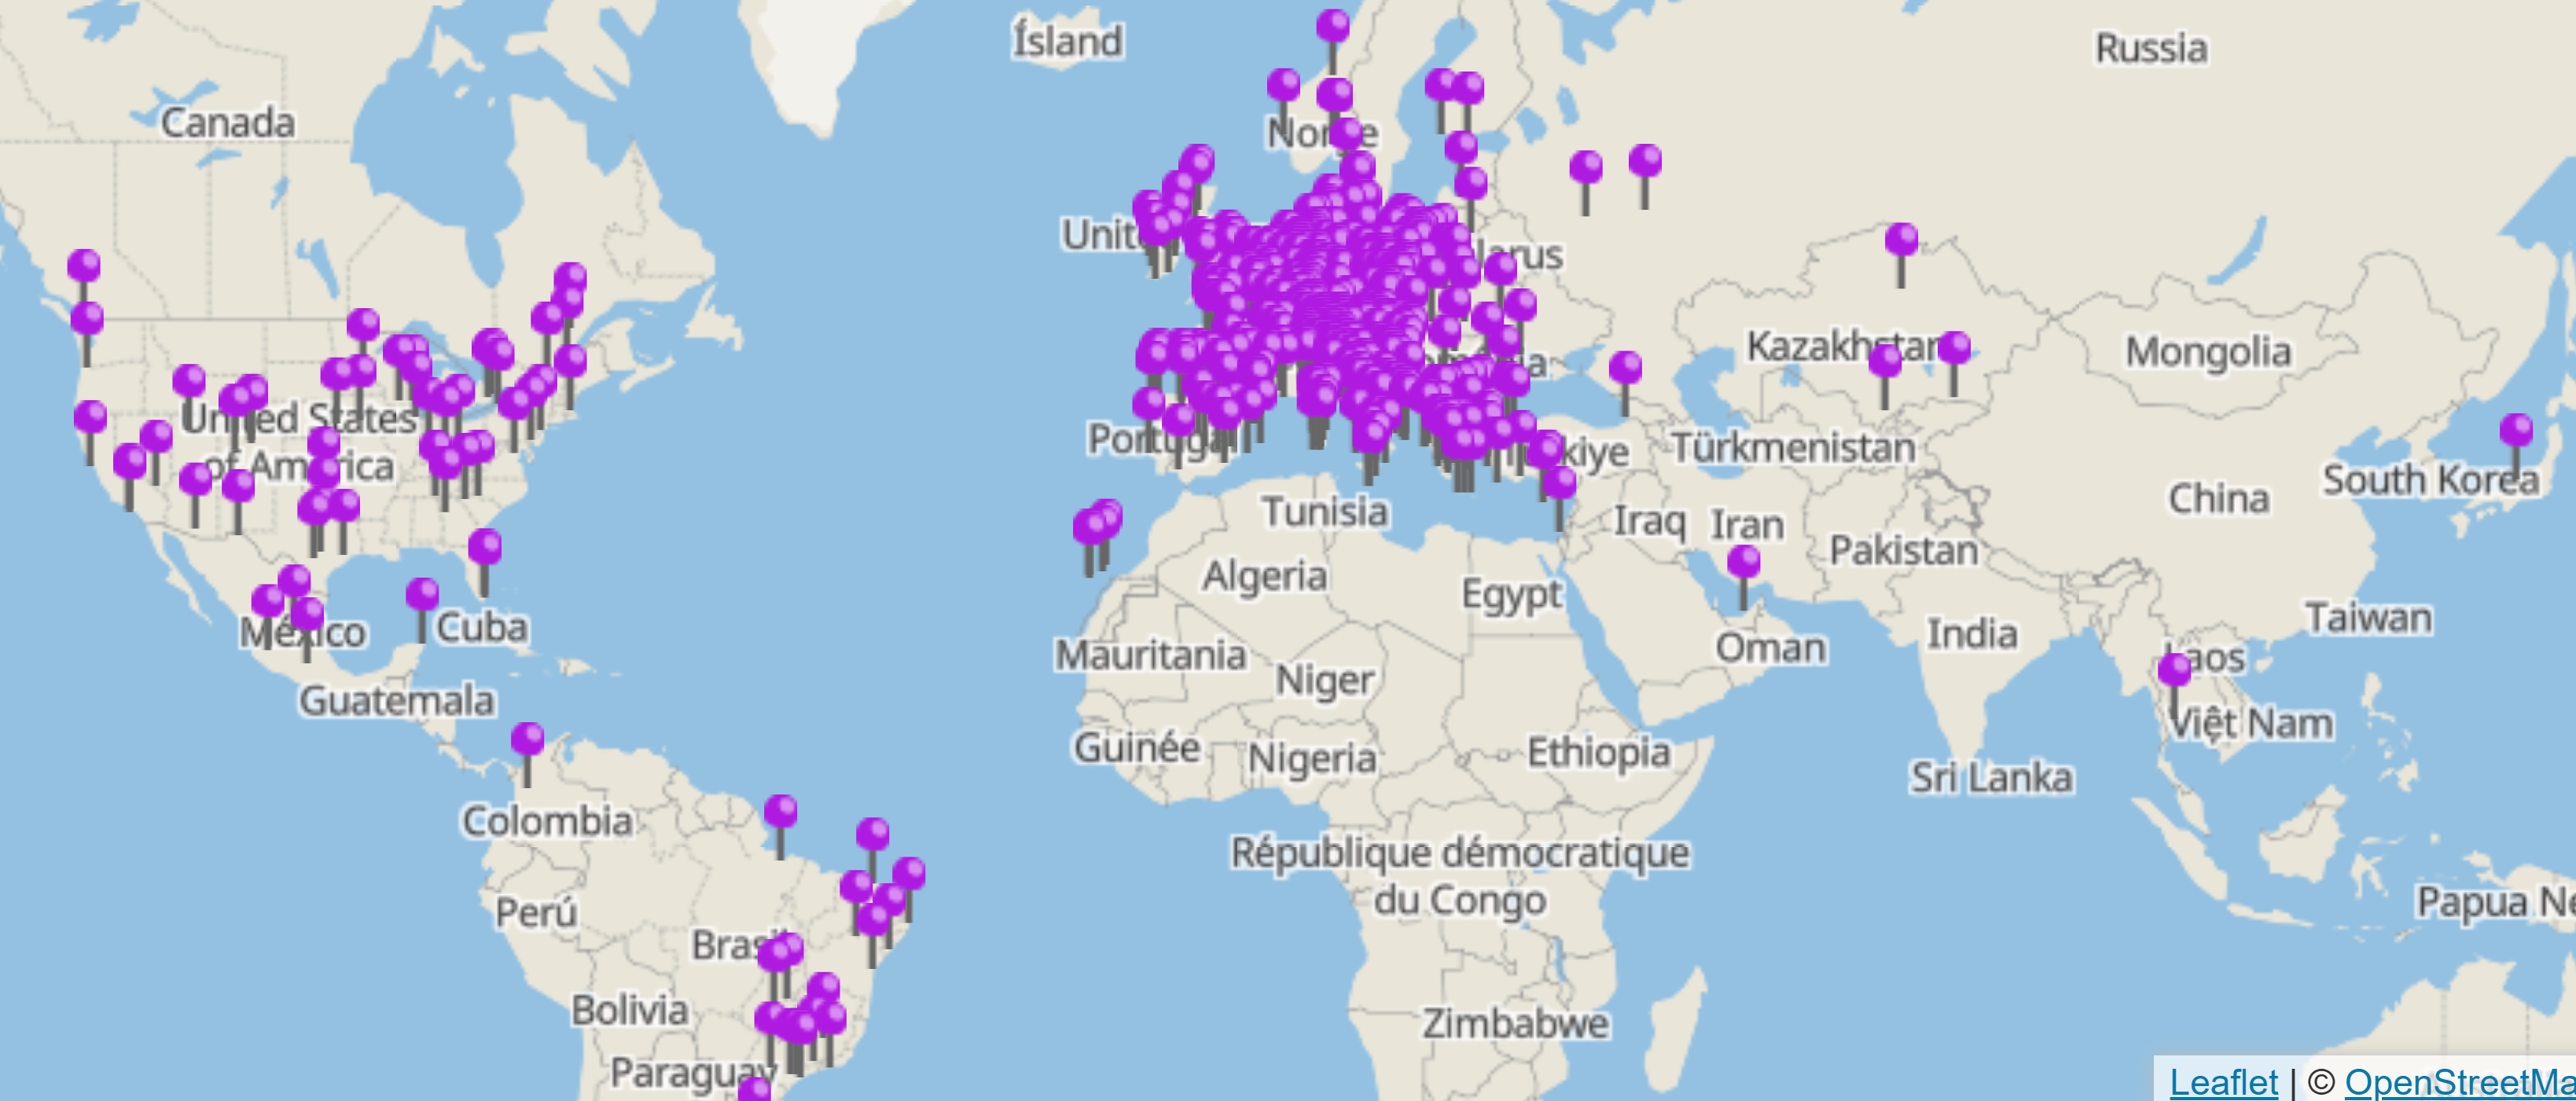

### Project/Goals:


The tasks are as follows:
1. Explore the structure of the API, query the API and understand the data returned. 
[This is a link to google for the API cityBikes website](http://api.citybik.es/v2/)  

2. Choose a city covered by the CityBikes API and retrieve all available bike stations in that city. 

    
3. For each bike station, use the API to call the latitude, longitude and number of bikes. 
    
4. Parse the JSON object into a Pandas dataframe. 


What is citybikes? 
Citybikes is an API that provides bike sharing data for apps, research and projects. And supports more than 400 cities.

I chose NEW YORK city in the US country. It is ONE of the biggest cities in the world that uses citybikes serveries. In this project I scrape and investigate  data that taken from CityBikes company.


### Process

I performed this project by two methods. 
First: calling using requests library
Second: calling using CityBike library
Both methods have different techniques to fetching data and to export json files.

### Challenges

Reading nested dictionary from json file, flaten, and converting to csv

### Import Libraries

In [2]:
# Import necessary Libraries
import requests # library to handle requests
import pandas as pd # library for data analsysis
import numpy as np # library to handle data in a vectorized manner
import random # library for random number generation

# libraries for displaying images
from IPython.display import Image 
from IPython.core.display import HTML 
    
# tranforming json file into a pandas dataframe library
from pandas import json_normalize

#!pip install folium
import folium # plotting library

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
import json 
import requests

import matplotlib.cm as cm
import matplotlib.colors as colors

from sklearn.cluster import KMeans

from urllib.request import urlopen
from bs4 import BeautifulSoup

from IPython.display import JSON 
import citybikes

print('Folium installed')
print('Libraries imported.')

Folium installed
Libraries imported.


In [11]:
#!pip install python-citybikes

### The first method:

In [3]:
# get network data
citybike_networks = requests.get("http://api.citybik.es/v2/networks").json()

In [4]:
# view json in nice format
networks_json = JSON(citybike_networks)
networks_json

<IPython.core.display.JSON object>

In [77]:
with open("citybike_networks.json","w") as f:
    json.dump(citybike_networks,f)

In [82]:
df = pd.read_json("citybike_networks.json")
df.to_csv("citybike_networks_out.csv", index=False)

In [11]:
pd.options.display.max_colwidth = 5000
pd.read_csv("citybike_networks_out.csv").head(10)

,networks
0,"{'company': ['ЗАО «СитиБайк»'], 'href': '/v2/networks/velobike-moscow', 'id': 'velobike-moscow', 'location': {'city': 'Moscow', 'country': 'RU', 'latitude': 55.75, 'longitude': 37.616667}, 'name': 'Velobike'}"
1,"{'company': ['Urban Infrastructure Partner'], 'href': '/v2/networks/baerum-bysykkel', 'id': 'baerum-bysykkel', 'location': {'city': 'Bærum', 'country': 'NO', 'latitude': 59.89455, 'longitude': 10.546343}, 'name': 'Bysykkel'}"
2,"{'company': ['Comunicare S.r.l.'], 'href': '/v2/networks/bicincitta-siena', 'id': 'bicincitta-siena', 'location': {'city': 'Siena', 'country': 'IT', 'latitude': 43.3186, 'longitude': 11.3306}, 'name': 'Bicincittà', 'source': 'https://www.bicincitta.com/frmLeStazioni.aspx?ID=202'}"
3,"{'company': ['Cyclopolis Systems'], 'href': '/v2/networks/cyclopolis-maroussi', 'id': 'cyclopolis-maroussi', 'location': {'city': 'Maroussi', 'country': 'GR', 'latitude': 38.0568722388, 'longitude': 23.8083299536}, 'name': 'Cyclopolis'}"
4,"{'company': ['Cyclopolis Systems'], 'href': '/v2/networks/cyclopolis-nafplio', 'id': 'cyclopolis-nafplio', 'location': {'city': 'Nafplio', 'country': 'GR', 'latitude': 37.5639397319, 'longitude': 22.8093402872}, 'name': 'Cyclopolis'}"
5,"{'company': ['Comunicare S.r.l.'], 'href': '/v2/networks/bicincitta-parco-dei-colli-di-bergamo', 'id': 'bicincitta-parco-dei-colli-di-bergamo', 'location': {'city': 'Parco dei Colli di Bergamo', 'country': 'IT', 'latitude': 45.72295637032245, 'longitude': 9.649230073016383}, 'name': 'Bicincittà', 'source': 'https://www.bicincitta.com/frmLeStazioni.aspx?ID=203'}"
6,"{'company': ['Cyclopolis Systems'], 'href': '/v2/networks/cyclopolis-aigialeia', 'id': 'cyclopolis-aigialeia', 'location': {'city': 'Aigialeia', 'country': 'GR', 'latitude': 38.2511101325, 'longitude': 22.0821570196}, 'name': 'Cyclopolis'}"
7,"{'company': ['Cyclopolis Systems'], 'href': '/v2/networks/cyclopolis-marathon', 'id': 'cyclopolis-marathon', 'location': {'city': 'Marathon', 'country': 'GR', 'latitude': 38.0855680022, 'longitude': 23.9776389963}, 'name': 'Cyclopolis'}"
8,"{'company': ['Comunicare S.r.l.'], 'href': '/v2/networks/bicincitta-mantova', 'id': 'bicincitta-mantova', 'location': {'city': 'Mantova', 'country': 'IT', 'latitude': 45.15866370764634, 'longitude': 10.783718973016335}, 'name': 'Bicincittà', 'source': 'https://www.bicincitta.com/frmLeStazioni.aspx?ID=204'}"
9,"{'company': ['Cyclopolis Systems'], 'href': '/v2/networks/cyclopolis-neasmyrni', 'id': 'cyclopolis-neasmyrni', 'location': {'city': 'Νea Smyrni', 'country': 'GR', 'latitude': 37.9381, 'longitude': 23.7126}, 'name': 'Cyclopolis'}"


### The second method

In [44]:
import citybikes

from pandas import json_normalize

In [5]:
client = citybikes.Client()
client

In [6]:
# Get the full list of networks
networks = list(client.networks)

In [7]:
print(type(networks))

<class 'list'>


In [8]:
len(networks)

590

In [51]:
#df_networks = print(networks)

In [9]:
# By searching in the list about any city or company, we can change the number
networks[1]

{'company': ['Urban Infrastructure Partner'], 'href': '/v2/networks/baerum-bysykkel', 'id': 'baerum-bysykkel', 'location': {'city': 'Bærum', 'country': 'NO', 'latitude': 59.89455, 'longitude': 10.546343}, 'name': 'Bysykkel'}

In [10]:
# New York city , company 'NYC Bike Share, LLC'
networks[97]

{'company': ['NYC Bike Share, LLC', 'Motivate International, Inc.', 'PBSC Urban Solutions'], 'ebikes': True, 'gbfs_href': 'https://gbfs.citibikenyc.com/gbfs/gbfs.json', 'href': '/v2/networks/citi-bike-nyc', 'id': 'citi-bike-nyc', 'location': {'city': 'New York, NY', 'country': 'US', 'latitude': 40.7143528, 'longitude': -74.00597309999999}, 'name': 'Citi Bike'}

### NEW YORK City

In [85]:
# For all stations in "NEW YORK"
# Look at NEW YORK.json file in Data folder (GitHub), uid='citi-bike-nyc'

client = citybikes.Client()
NYC_stations = citybikes.Network(client, uid='citi-bike-nyc')


Parse through the response to get the details you want for the bike stations in that city (latitude, longitude, number of bikes). 

In [136]:
# Get number of stations in New York city from a network
len(networks[97].stations)

2029

There are 2029 bike stations in NEW YORK city.

### Export all stations data in "NEW YORK"

In [23]:
# The details about the bike stations in NEW YORK city 
# (latitude, longitude, number of bikes). 

In [60]:
tt = len(networks[97].stations)

NYC = []

for stat in range(tt):
    station_NYC = list(networks[97].stations)[stat]
    NYC.append(station_NYC)
    

In [105]:
NYC[0]

{'empty_slots': 21, 'extra': {'ebikes': 4, 'has_ebikes': True, 'last_updated': 1696285803, 'payment': ['key', 'creditcard'], 'payment-terminal': True, 'rental_uris': {'android': 'https://bkn.lft.to/lastmile_qr_scan', 'ios': 'https://bkn.lft.to/lastmile_qr_scan'}, 'renting': 1, 'returning': 1, 'slots': 39, 'uid': '66de099d-0aca-11e7-82f6-3863bb44ef7c'}, 'free_bikes': 12, 'id': '46a983722ee1f51813a6a3eb6534a6e4', 'latitude': 40.795, 'longitude': -73.9645, 'name': 'W 100 St & Manhattan Ave', 'timestamp': '2023-10-02T22:31:36.356000Z'}

In [106]:
# Let take a sample about the Bike Stations:
# the first station
list(networks[97].stations)[0]

{'empty_slots': 21, 'extra': {'ebikes': 4, 'has_ebikes': True, 'last_updated': 1696285803, 'payment': ['key', 'creditcard'], 'payment-terminal': True, 'rental_uris': {'android': 'https://bkn.lft.to/lastmile_qr_scan', 'ios': 'https://bkn.lft.to/lastmile_qr_scan'}, 'renting': 1, 'returning': 1, 'slots': 39, 'uid': '66de099d-0aca-11e7-82f6-3863bb44ef7c'}, 'free_bikes': 12, 'id': '46a983722ee1f51813a6a3eb6534a6e4', 'latitude': 40.795, 'longitude': -73.9645, 'name': 'W 100 St & Manhattan Ave', 'timestamp': '2023-10-02T22:31:36.356000Z'}

In [16]:
# Lets get the nearest network to NY lat, lng
# Laatitude : 40.7143528, 
# Longitude : -74.00597309999999

net, dist = next(iter(client.networks.near(40.7143528, -74.00597309999999)))
net

{'company': ['NYC Bike Share, LLC', 'Motivate International, Inc.', 'PBSC Urban Solutions'], 'ebikes': True, 'gbfs_href': 'https://gbfs.citibikenyc.com/gbfs/gbfs.json', 'href': '/v2/networks/citi-bike-nyc', 'id': 'citi-bike-nyc', 'location': {'city': 'New York, NY', 'country': 'US', 'latitude': 40.7143528, 'longitude': -74.00597309999999}, 'name': 'Citi Bike'}

In [88]:
# Export and write json file

with open('NYC_stations_second.json', 'w') as f:
    json.dump(NYC_stations.data, f, indent=2)

In [137]:
# read json file and export csv file
df = pd.read_json("NYC_stations_second.json")
df.to_csv("NYC_stations_out.csv", index=False)

In [6]:
# read csv file
df1 = pd.read_csv("NYC_stations_out.csv")
df1.head()

,empty_slots,extra,free_bikes,id,latitude,longitude,name,timestamp
0,13,"{'ebikes': 5, 'has_ebikes': True, 'last_updated': 1696291857, 'payment': ['key', 'creditcard'], 'payment-terminal': True, 'rental_uris': {'android': 'https://bkn.lft.to/lastmile_qr_scan', 'ios': 'https://bkn.lft.to/lastmile_qr_scan'}, 'renting': 1, 'returning': 1, 'slots': 39, 'uid': '66de099d-0aca-11e7-82f6-3863bb44ef7c'}",20,46a983722ee1f51813a6a3eb6534a6e4,40.795000,-73.964500,W 100 St & Manhattan Ave,2023-10-03 00:11:38.169000+00:00
1,35,"{'ebikes': 0, 'has_ebikes': True, 'last_updated': 1696291834, 'payment': ['key', 'creditcard'], 'payment-terminal': True, 'rental_uris': {'android': 'https://bkn.lft.to/lastmile_qr_scan', 'ios': 'https://bkn.lft.to/lastmile_qr_scan'}, 'renting': 1, 'returning': 1, 'slots': 81, 'uid': 'b94cc90e-9ca2-4471-8371-23be051e0157'}",22,81872dcff5f0e5f1e042aafcc0bab6fd,40.766741,-73.979069,7 Ave & Central Park South,2023-10-03 00:11:37.883000+00:00
2,0,"{'ebikes': 2, 'has_ebikes': True, 'last_updated': 1696291826, 'payment': ['key', 'creditcard'], 'payment-terminal': True, 'rental_uris': {'android': 'https://bkn.lft.to/lastmile_qr_scan', 'ios': 'https://bkn.lft.to/lastmile_qr_scan'}, 'renting': 1, 'returning': 1, 'slots': 27, 'uid': '9a40cb60-6ede-4c9e-9d64-dc55cae57f31'}",5,75a634e2473d7e3abf789c09c44fdf26,40.751047,-73.937970,28 St & 41 Ave,2023-10-03 00:11:37.254000+00:00
3,0,"{'ebikes': 2, 'has_ebikes': True, 'last_updated': 1696291807, 'payment': ['key', 'creditcard'], 'payment-terminal': True, 'rental_uris': {'android': 'https://bkn.lft.to/lastmile_qr_scan', 'ios': 'https://bkn.lft.to/lastmile_qr_scan'}, 'renting': 1, 'returning': 1, 'slots': 37, 'uid': '46bdd925-fb6c-4654-85d8-e0db4da62abf'}",30,fdb4831d3335a9aea380117ea4f4b81a,40.801694,-73.957145,Frederick Douglass Blvd & W 112 St,2023-10-03 00:11:38.293000+00:00
4,8,"{'ebikes': 0, 'has_ebikes': True, 'last_updated': 1696291802, 'payment': ['key', 'creditcard'], 'payment-terminal': True, 'rental_uris': {'android': 'https://bkn.lft.to/lastmile_qr_scan', 'ios': 'https://bkn.lft.to/lastmile_qr_scan'}, 'renting': 1, 'returning': 1, 'slots': 23, 'uid': '594b4656-9d83-4301-8967-3b92c126531c'}",14,678fea3bb3afe05788a35750358db726,40.795508,-73.941606,3 Ave & E 112 St,2023-10-03 00:11:37.945000+00:00


cherrypicker aims to make common ETL tasks (filtering data and restructuring it into flat tables) easier, by taking inspiration from jQuery and applying it in a Pythonic way to generic data objects.

In [7]:
from cherrypicker import CherryPicker
import json
import pandas as pd

with open('NYC_stations_second.json') as file:
    data = json.load(file)

picker = CherryPicker(data)
flat = picker['extra'].flatten().get()
df2 = pd.DataFrame(flat)
df2.head()

,ebikes,has_ebikes,last_updated,payment_0,payment_1,payment-terminal,rental_uris_android,rental_uris_ios,renting,returning,slots,uid
0,5,True,1696291857,key,creditcard,True,https://bkn.lft.to/lastmile_qr_scan,https://bkn.lft.to/lastmile_qr_scan,1,1,39,66de099d-0aca-11e7-82f6-3863bb44ef7c
1,0,True,1696291834,key,creditcard,True,https://bkn.lft.to/lastmile_qr_scan,https://bkn.lft.to/lastmile_qr_scan,1,1,81,b94cc90e-9ca2-4471-8371-23be051e0157
2,2,True,1696291826,key,creditcard,True,https://bkn.lft.to/lastmile_qr_scan,https://bkn.lft.to/lastmile_qr_scan,1,1,27,9a40cb60-6ede-4c9e-9d64-dc55cae57f31
3,2,True,1696291807,key,creditcard,True,https://bkn.lft.to/lastmile_qr_scan,https://bkn.lft.to/lastmile_qr_scan,1,1,37,46bdd925-fb6c-4654-85d8-e0db4da62abf
4,0,True,1696291802,key,creditcard,True,https://bkn.lft.to/lastmile_qr_scan,https://bkn.lft.to/lastmile_qr_scan,1,1,23,594b4656-9d83-4301-8967-3b92c126531c


In [130]:
df1.columns

Index(['empty_slots', 'extra', 'free_bikes', 'id', 'latitude', 'longitude',
       'name', 'timestamp'],
      dtype='object')

In [131]:
df2.columns

Index(['ebikes', 'has_ebikes', 'last_updated', 'payment_0', 'payment_1',
       'payment-terminal', 'rental_uris_android', 'rental_uris_ios', 'renting',
       'returning', 'slots', 'uid'],
      dtype='object')

In [8]:
lst = [df1, df2]  # List of your dataframes
df_citybike= pd.concat(lst, axis =1)
df_citybike.head()

,empty_slots,extra,free_bikes,id,latitude,longitude,name,timestamp,ebikes,has_ebikes,last_updated,payment_0,payment_1,payment-terminal,rental_uris_android,rental_uris_ios,renting,returning,slots,uid
0,13,"{'ebikes': 5, 'has_ebikes': True, 'last_updated': 1696291857, 'payment': ['key', 'creditcard'], 'payment-terminal': True, 'rental_uris': {'android': 'https://bkn.lft.to/lastmile_qr_scan', 'ios': 'https://bkn.lft.to/lastmile_qr_scan'}, 'renting': 1, 'returning': 1, 'slots': 39, 'uid': '66de099d-0aca-11e7-82f6-3863bb44ef7c'}",20,46a983722ee1f51813a6a3eb6534a6e4,40.795000,-73.964500,W 100 St & Manhattan Ave,2023-10-03 00:11:38.169000+00:00,5,True,1696291857,key,creditcard,True,https://bkn.lft.to/lastmile_qr_scan,https://bkn.lft.to/lastmile_qr_scan,1,1,39,66de099d-0aca-11e7-82f6-3863bb44ef7c
1,35,"{'ebikes': 0, 'has_ebikes': True, 'last_updated': 1696291834, 'payment': ['key', 'creditcard'], 'payment-terminal': True, 'rental_uris': {'android': 'https://bkn.lft.to/lastmile_qr_scan', 'ios': 'https://bkn.lft.to/lastmile_qr_scan'}, 'renting': 1, 'returning': 1, 'slots': 81, 'uid': 'b94cc90e-9ca2-4471-8371-23be051e0157'}",22,81872dcff5f0e5f1e042aafcc0bab6fd,40.766741,-73.979069,7 Ave & Central Park South,2023-10-03 00:11:37.883000+00:00,0,True,1696291834,key,creditcard,True,https://bkn.lft.to/lastmile_qr_scan,https://bkn.lft.to/lastmile_qr_scan,1,1,81,b94cc90e-9ca2-4471-8371-23be051e0157
2,0,"{'ebikes': 2, 'has_ebikes': True, 'last_updated': 1696291826, 'payment': ['key', 'creditcard'], 'payment-terminal': True, 'rental_uris': {'android': 'https://bkn.lft.to/lastmile_qr_scan', 'ios': 'https://bkn.lft.to/lastmile_qr_scan'}, 'renting': 1, 'returning': 1, 'slots': 27, 'uid': '9a40cb60-6ede-4c9e-9d64-dc55cae57f31'}",5,75a634e2473d7e3abf789c09c44fdf26,40.751047,-73.937970,28 St & 41 Ave,2023-10-03 00:11:37.254000+00:00,2,True,1696291826,key,creditcard,True,https://bkn.lft.to/lastmile_qr_scan,https://bkn.lft.to/lastmile_qr_scan,1,1,27,9a40cb60-6ede-4c9e-9d64-dc55cae57f31
3,0,"{'ebikes': 2, 'has_ebikes': True, 'last_updated': 1696291807, 'payment': ['key', 'creditcard'], 'payment-terminal': True, 'rental_uris': {'android': 'https://bkn.lft.to/lastmile_qr_scan', 'ios': 'https://bkn.lft.to/lastmile_qr_scan'}, 'renting': 1, 'returning': 1, 'slots': 37, 'uid': '46bdd925-fb6c-4654-85d8-e0db4da62abf'}",30,fdb4831d3335a9aea380117ea4f4b81a,40.801694,-73.957145,Frederick Douglass Blvd & W 112 St,2023-10-03 00:11:38.293000+00:00,2,True,1696291807,key,creditcard,True,https://bkn.lft.to/lastmile_qr_scan,https://bkn.lft.to/lastmile_qr_scan,1,1,37,46bdd925-fb6c-4654-85d8-e0db4da62abf
4,8,"{'ebikes': 0, 'has_ebikes': True, 'last_updated': 1696291802, 'payment': ['key', 'creditcard'], 'payment-terminal': True, 'rental_uris': {'android': 'https://bkn.lft.to/lastmile_qr_scan', 'ios': 'https://bkn.lft.to/lastmile_qr_scan'}, 'renting': 1, 'returning': 1, 'slots': 23, 'uid': '594b4656-9d83-4301-8967-3b92c126531c'}",14,678fea3bb3afe05788a35750358db726,40.795508,-73.941606,3 Ave & E 112 St,2023-10-03 00:11:37.945000+00:00,0,True,1696291802,key,creditcard,True,https://bkn.lft.to/lastmile_qr_scan,https://bkn.lft.to/lastmile_qr_scan,1,1,23,594b4656-9d83-4301-8967-3b92c126531c


In [139]:
df_citybike.columns

Index(['empty_slots', 'extra', 'free_bikes', 'id', 'latitude', 'longitude',
       'name', 'timestamp', 'ebikes', 'has_ebikes', 'last_updated',
       'payment_0', 'payment_1', 'payment-terminal', 'rental_uris_android',
       'rental_uris_ios', 'renting', 'returning', 'slots', 'uid'],
      dtype='object')

In [140]:
df_citybike.to_csv("df_citybike.csv", index=False)

Put parsed results into a DataFrame.

In [9]:
# Save the jsom file and converted to csv file, then read it
#reading our dataset
NYC_citybike = pd.read_csv("df_citybike.csv")
NYC_citybike.head()

,empty_slots,extra,free_bikes,id,latitude,longitude,name,timestamp,ebikes,has_ebikes,last_updated,payment_0,payment_1,payment-terminal,rental_uris_android,rental_uris_ios,renting,returning,slots,uid
0,13,"{'ebikes': 5, 'has_ebikes': True, 'last_updated': 1696291857, 'payment': ['key', 'creditcard'], 'payment-terminal': True, 'rental_uris': {'android': 'https://bkn.lft.to/lastmile_qr_scan', 'ios': 'https://bkn.lft.to/lastmile_qr_scan'}, 'renting': 1, 'returning': 1, 'slots': 39, 'uid': '66de099d-0aca-11e7-82f6-3863bb44ef7c'}",20,46a983722ee1f51813a6a3eb6534a6e4,40.795000,-73.964500,W 100 St & Manhattan Ave,2023-10-03 00:11:38.169000+00:00,5,True,1696291857,key,creditcard,True,https://bkn.lft.to/lastmile_qr_scan,https://bkn.lft.to/lastmile_qr_scan,1,1,39,66de099d-0aca-11e7-82f6-3863bb44ef7c
1,35,"{'ebikes': 0, 'has_ebikes': True, 'last_updated': 1696291834, 'payment': ['key', 'creditcard'], 'payment-terminal': True, 'rental_uris': {'android': 'https://bkn.lft.to/lastmile_qr_scan', 'ios': 'https://bkn.lft.to/lastmile_qr_scan'}, 'renting': 1, 'returning': 1, 'slots': 81, 'uid': 'b94cc90e-9ca2-4471-8371-23be051e0157'}",22,81872dcff5f0e5f1e042aafcc0bab6fd,40.766741,-73.979069,7 Ave & Central Park South,2023-10-03 00:11:37.883000+00:00,0,True,1696291834,key,creditcard,True,https://bkn.lft.to/lastmile_qr_scan,https://bkn.lft.to/lastmile_qr_scan,1,1,81,b94cc90e-9ca2-4471-8371-23be051e0157
2,0,"{'ebikes': 2, 'has_ebikes': True, 'last_updated': 1696291826, 'payment': ['key', 'creditcard'], 'payment-terminal': True, 'rental_uris': {'android': 'https://bkn.lft.to/lastmile_qr_scan', 'ios': 'https://bkn.lft.to/lastmile_qr_scan'}, 'renting': 1, 'returning': 1, 'slots': 27, 'uid': '9a40cb60-6ede-4c9e-9d64-dc55cae57f31'}",5,75a634e2473d7e3abf789c09c44fdf26,40.751047,-73.937970,28 St & 41 Ave,2023-10-03 00:11:37.254000+00:00,2,True,1696291826,key,creditcard,True,https://bkn.lft.to/lastmile_qr_scan,https://bkn.lft.to/lastmile_qr_scan,1,1,27,9a40cb60-6ede-4c9e-9d64-dc55cae57f31
3,0,"{'ebikes': 2, 'has_ebikes': True, 'last_updated': 1696291807, 'payment': ['key', 'creditcard'], 'payment-terminal': True, 'rental_uris': {'android': 'https://bkn.lft.to/lastmile_qr_scan', 'ios': 'https://bkn.lft.to/lastmile_qr_scan'}, 'renting': 1, 'returning': 1, 'slots': 37, 'uid': '46bdd925-fb6c-4654-85d8-e0db4da62abf'}",30,fdb4831d3335a9aea380117ea4f4b81a,40.801694,-73.957145,Frederick Douglass Blvd & W 112 St,2023-10-03 00:11:38.293000+00:00,2,True,1696291807,key,creditcard,True,https://bkn.lft.to/lastmile_qr_scan,https://bkn.lft.to/lastmile_qr_scan,1,1,37,46bdd925-fb6c-4654-85d8-e0db4da62abf
4,8,"{'ebikes': 0, 'has_ebikes': True, 'last_updated': 1696291802, 'payment': ['key', 'creditcard'], 'payment-terminal': True, 'rental_uris': {'android': 'https://bkn.lft.to/lastmile_qr_scan', 'ios': 'https://bkn.lft.to/lastmile_qr_scan'}, 'renting': 1, 'returning': 1, 'slots': 23, 'uid': '594b4656-9d83-4301-8967-3b92c126531c'}",14,678fea3bb3afe05788a35750358db726,40.795508,-73.941606,3 Ave & E 112 St,2023-10-03 00:11:37.945000+00:00,0,True,1696291802,key,creditcard,True,https://bkn.lft.to/lastmile_qr_scan,https://bkn.lft.to/lastmile_qr_scan,1,1,23,594b4656-9d83-4301-8967-3b92c126531c


In [142]:
# Check the descriptive information
NYC_citybike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2029 entries, 0 to 2028
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   empty_slots          2029 non-null   int64  
 1   extra                2029 non-null   object 
 2   free_bikes           2029 non-null   int64  
 3   id                   2029 non-null   object 
 4   latitude             2029 non-null   float64
 5   longitude            2029 non-null   float64
 6   name                 2029 non-null   object 
 7   timestamp            2029 non-null   object 
 8   ebikes               2029 non-null   int64  
 9   has_ebikes           2029 non-null   bool   
 10  last_updated         2029 non-null   int64  
 11  payment_0            2029 non-null   object 
 12  payment_1            2029 non-null   object 
 13  payment-terminal     2029 non-null   bool   
 14  rental_uris_android  2029 non-null   object 
 15  rental_uris_ios      2029 non-null   o

In [144]:
# Check the shape of df

print(NYC_citybike.shape)

(2029, 20)


In [362]:
#In Parts 2 and 3, will do
# For all the following steps, I performed in the part of model_building
# DATA QUALITY CHECK
# Check for NULL/MISSING values
# row-wise null count percentage
# Duplicate Check
# Data Cleaning
# Checking value_counts() for entire dataframe.

### Look at parts 2 & 3